In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [4]:
r = 0.025

In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [6]:
type(stdev)

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([ 0.17655025])

In [8]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[  91.190002  ,   91.190002  ,   91.190002  , ...,   91.190002  ,
          91.190002  ,   91.190002  ],
       [  90.60684353,   94.37319829,   90.76210001, ...,   91.42778551,
          91.1054645 ,   93.66884134],
       [  90.73656995,   93.6216198 ,   92.6021924 , ...,   92.82855088,
          91.13881338,   94.21459109],
       ..., 
       [ 103.15950518,   84.13033523,   92.469377  , ...,   76.26563467,
          98.72585774,   69.92895771],
       [ 100.76036086,   83.19442575,   92.77152691, ...,   74.46336405,
          98.77279222,   70.36800746],
       [ 100.73602785,   83.14626458,   92.51431391, ...,   74.85926894,
          99.05629882,   70.27339017]])

In [12]:
S.shape

(251L, 10000L)

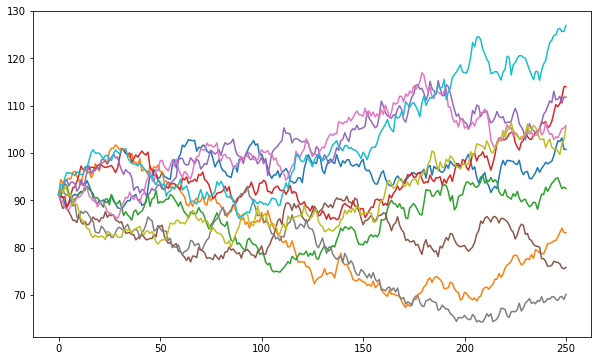

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);